##### Student Name: Nayem Alam
##### Student ID  : 260743549
##### Assignment 1

## Part 2.1
    Q. 1,2,3,4 - SIFT

### 1. Compute SIFT keypoints and corresponding descriptors for images 1Hill and 2Hill

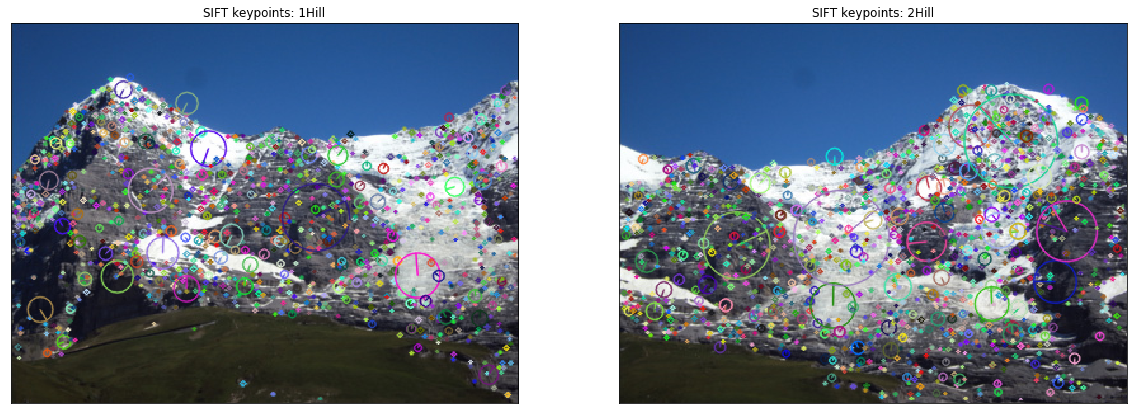

In [63]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# load and read image
firstPic = "./1Hill.JPG"
secondPic = "./2Hill.JPG"
oneHill = cv2.imread(firstPic)
twoHill = cv2.imread(secondPic)

# convert from BGR to RGB; so it's not blue colored pic
oneHillRGB = cv2.cvtColor(oneHill, cv2.COLOR_BGR2RGB)
twoHillRGB = cv2.cvtColor(twoHill, cv2.COLOR_BGR2RGB)

# output copies
oneHilldisp = oneHillRGB.copy()
twoHilldisp = twoHillRGB.copy()

# initiate SIFT
siftImg = cv2.xfeatures2d.SIFT_create()
keypoints1, descriptors1 = siftImg.detectAndCompute(oneHillRGB, None)
keypoints2, descriptors2 = siftImg.detectAndCompute(twoHillRGB, None)

# draw keypoints for sift
drawKeypts1 = cv2.drawKeypoints(oneHillRGB, keypoints1, oneHilldisp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
drawKeypts2 = cv2.drawKeypoints(twoHillRGB, keypoints2, twoHilldisp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(oneHilldisp)
plt.title("SIFT keypoints: 1Hill"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(twoHilldisp)
plt.title("SIFT keypoints: 2Hill"), plt.xticks([]), plt.yticks([])
plt.show()

### 2. Find matching keypoints in two images and display the 20 best pairs.

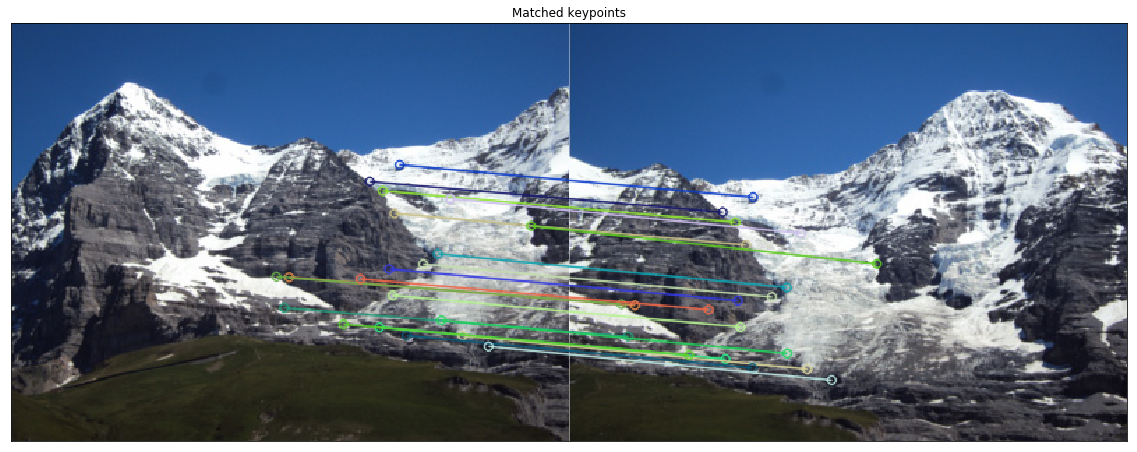

Number of matches:  20


In [66]:
# matching using brute force (taking the descriptor of one feature from first set to other features in second set)
bf = cv2.BFMatcher()

# match descriptors
matches = bf.match(descriptors1,descriptors2)

# sort in order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# draw 20 best matches
bestMatches = matches[:20]
imgMatch = cv2.drawMatches(oneHillRGB,keypoints1,twoHillRGB,keypoints2, bestMatches, oneHillRGB, flags=2)

plt.figure(figsize=(20,20))
plt.imshow(imgMatch)
plt.title("Matched keypoints"), plt.xticks([]), plt.yticks([])
plt.show()

# to test
print("Number of matches: ",len(bestMatches))

### 3. Find homography using RANSAC method and apply transformation to 1Hill. Image 2Hill should not be transformed.

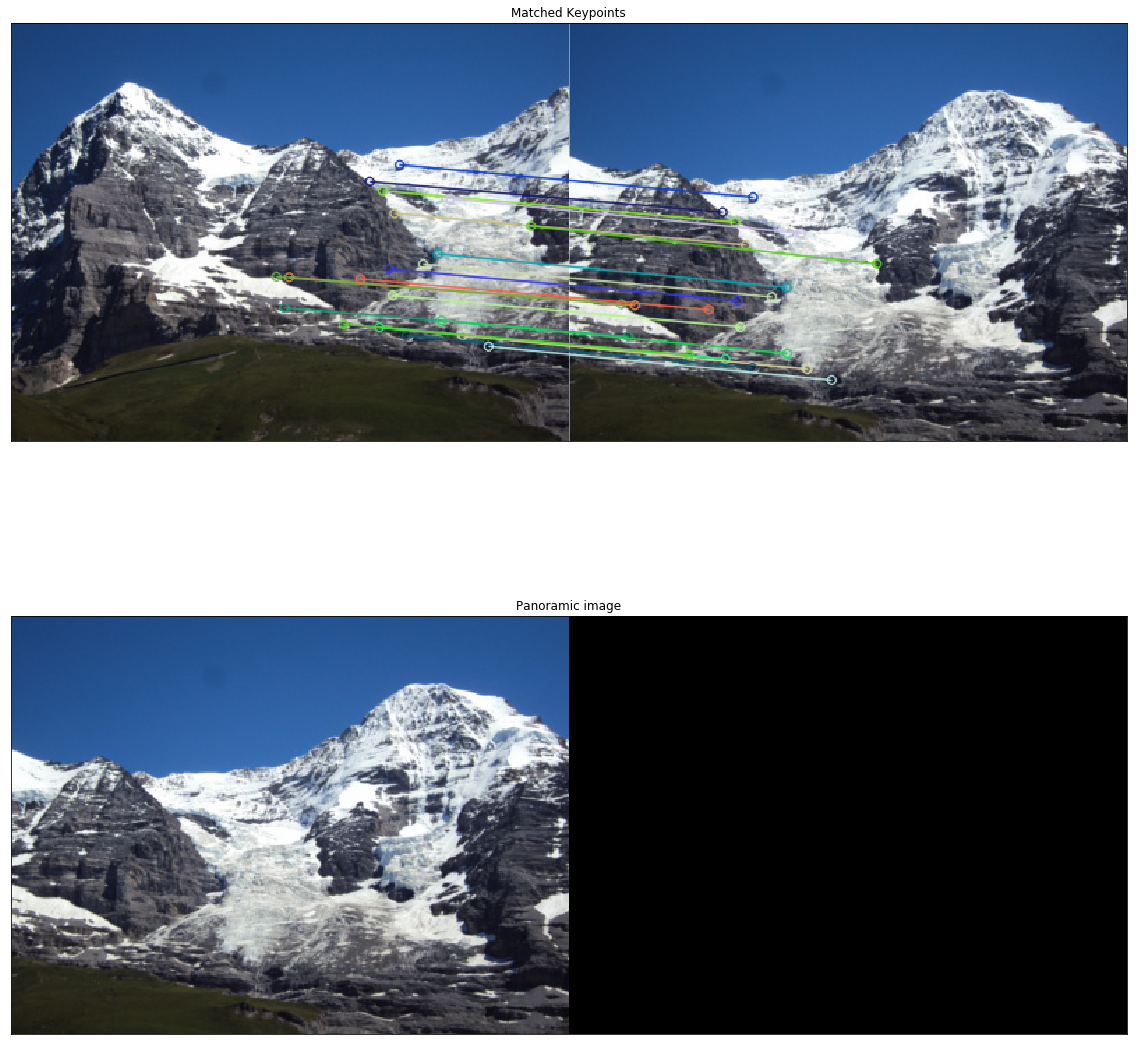

In [69]:
# Arrange matching keypoints in two separate lists
oneHillC = oneHillRGB.copy()
twoHillC = twoHillRGB.copy()

GoodMatches = []
for i, m in enumerate(matches):
    GoodMatches.append((m.trainIdx, m.queryIdx))

mpr = np.float32([keypoints1[i].pt for (__, i) in GoodMatches])
mpl = np.float32([keypoints2[i].pt for (i, __) in GoodMatches])

# find homography and wrap image accordingly
H, __ = cv2.findHomography(mpr, mpl, cv2.RANSAC, 4)
wimg = cv2.warpPerspective(twoHillRGB, H, (twoHillRGB.shape[1]+oneHillRGB.shape[1],twoHillRGB.shape[0]))
wimg[:,:twoHillRGB.shape[1],:] = twoHillRGB

plt.figure(figsize=(20,20))
plt.subplot(211)
plt.imshow(imgMatch)
plt.title("Matched Keypoints"), plt.xticks([]), plt.yticks([])
plt.subplot(212)
plt.imshow(wimg)
plt.title("Panoramic image"), plt.xticks([]), plt.yticks([])
plt.show()

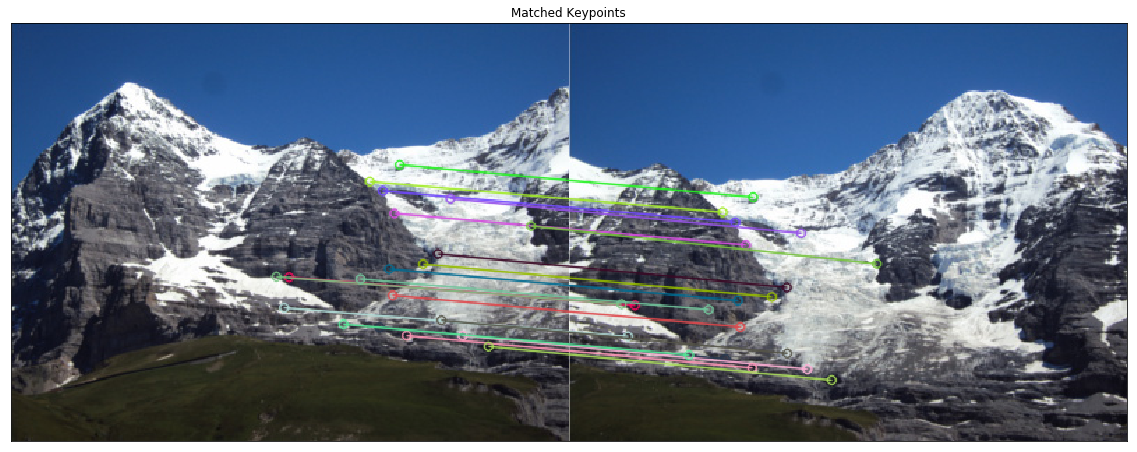

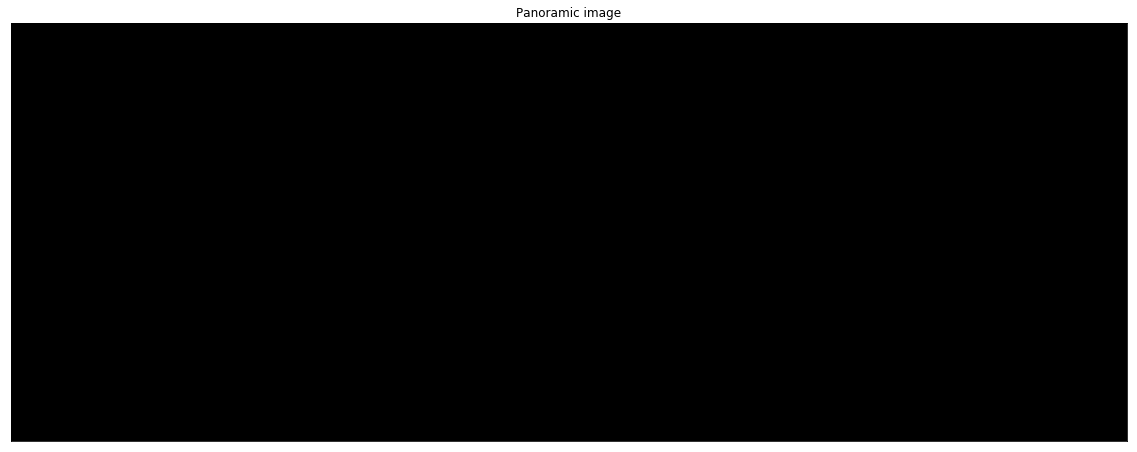

In [54]:
# Extract location of good matches
#points1 = np.zeros((len(matches), 2), dtype=np.float32)
#points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

for i in range(len(points1)):
    points1[i][0] += twoHillRGB.shape[1]
    
heightBuffer = 0                                     #so the final merged image isn't clipped
M = np.float32([[1,0,0],[0,1,heightBuffer],[0,0,1]]) #used to move down warped left image. 
H, __ = cv2.findHomography(points1, points2, cv2.RANSAC, 4)
wimg2 = cv2.warpPerspective(oneHillRGB, M.dot(H), (twoHillRGB.shape[1]+oneHillRGB.shape[1],twoHillRGB.shape[0]+4*heightBuffer)) 
    
    

    
    
    
# Find homography using RANSAC method
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

height, width, channels = twoHillRGB.shape
oneHillReg = cv2.warpPerspective(oneHillRGB, h, (width, height))

# # apply transformation to 1Hill; 2Hill isn't transformed
# ht, wt = oneHillRGB.shape[0:2] # image size
# # Create a rotated, scaled duplicate
# # rotation marix around the center pixel, 30 degrees,scale of 1.2
# M = cv2.getRotationMatrix2D((wt/2,ht/2),30,1.2)
# # Apply the transformation matrix
# wimg = cv2.warpAffine(twoHillRGB,M,(wt,ht))

plt.figure(figsize=(20,20))
plt.subplot(111)
plt.imshow(imgMatch)
plt.title("Matched Keypoints"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(211)
plt.imshow(wimg2)
plt.title("Panoramic image"), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# # we will try to match a randomly-selected feature from img1 to img2
# idx = 0
# # Loop through all descriptors in img2 to find the closest match
# bestMatch_idx = -1
# bestMatch_dist = float('inf')
# for i in range(descriptors2.shape[0]):
#     dist = cv2.norm(descriptors1[idx],descriptors2[i],cv2.NORM_L2)
#     if dist < bestMatch_dist:
#         bestMatch_dist = dist
#         bestMatch_idx = i
        
# # Draw the keypoints
# img_disp1 = img1.copy()
# img_disp2 = img2.copy()
# # draw a filled circle on each point
# center1 = (int(keypoints1[idx].pt[0]),int(keypoints1[idx].pt[1]))
# center2 = (int(keypoints2[bestMatch_idx].pt[0]),int(keypoints2[bestMatch_idx].pt[1]))
# cv2.circle(img_disp1, center1, 10, (255,0,0), -1)
# cv2.circle(img_disp2, center2, 12, (255,0,0), -1)

# # Display
# plt.subplot(221),plt.imshow(img_disp1),plt.title('img1')
# plt.xticks([]), plt.yticks([])
# plt.subplot(222),plt.imshow(img_disp2),plt.title('img2')
# plt.xticks([]), plt.yticks([])

# # Plot the descriptors
# plt.subplot(223),plt.plot(descriptors1[idx]),plt.title('desc1')
# plt.xlim([0,128]) # Set x-axis limit
# plt.subplot(224),plt.plot(descriptors2[bestMatch_idx]),plt.title('desc2')
# plt.xlim([0,128]) # Set x-axis limit
# plt.show() # display all subplots